In [1]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/juani/OneDrive/Escritorio/Facultad/TD8FINAL/TD8"))
from heuristicas.grid_heuristic import grid_heuristic, solve
from lectura_and_analisis.xml_parsing import xml_data_extractor
from lectura_and_analisis.analisis import calculate_area
from lectura_and_analisis.optimization_functions import change_dimensions, optimize_area
from lectura_and_analisis.rotation import *
from heuristicas.septima_heuristica import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def fun_generacion_mapa(yacimiento_coords, restricciones_data, rectangles, rect_size, angle):
    # Plotting the extracted data
    plt.figure(figsize=(10, 8))

        # Plot Yacimiento (main polygon)
    if yacimiento_coords:
        # Create and fill the polygon with translucent blue, no border
        yacimiento_polygon = patches.Polygon(
            yacimiento_coords,
            closed=True,
            facecolor='lightblue',
            edgecolor='none',
            alpha=0.5  # Adjust alpha for transparency
        )
        plt.gca().add_patch(yacimiento_polygon)



    # Plot Restricciones (obstacle polygons)
    for restriccion in restricciones_data:
        if restriccion:
            restriccion_x, restriccion_y = zip(*restriccion)
    
            # Plot the restriction outline with small dots
            plt.plot(restriccion_x, restriccion_y, 'ro-', markersize=1)
    
            # Fill the restriction polygon with translucent red
            restriccion_polygon = patches.Polygon(restriccion, closed=True, color='red', alpha=0.5)
            plt.gca().add_patch(restriccion_polygon)



    # Plot Pads as rectangles with rotation around the center
    for n in range(len(rectangles)):
        for i, rect in enumerate(rectangles[n]):
            if rect:  # Ensure the rectangle data is not empty
                width, height = rect_size[n]
                # Expecting rect to be a tuple or list: (center_x, center_y)
                center_x, center_y = rect
                # Calculate the bottom left corner based on the center and width/height
                bottom_left_x = center_x - width / 2
                bottom_left_y = center_y - height / 2

                # Create a rectangle patch with the given width, height, angle, and centered at the (center_x, center_y)
                rectangle = patches.Rectangle(
                    (bottom_left_x, bottom_left_y), 
                    width, 
                    height, 
                    angle=angle,
                    rotation_point = 'center', 
                    edgecolor='darkblue',      # Dark blue border
                    facecolor='darkblue',    # Light blue fill
                    linewidth=2,              # Border thickness
                    alpha=0.3,                # Transparency for the fill
                )

                # Add the rectangle to the plot
                plt.gca().add_patch(rectangle)

                # Plot the center of the rectangle as a dark blue dot
                plt.plot(center_x, center_y, 'o', color='darkblue', markersize=5, label='Center' if i == 0 else "")

    


    # Optionally, you can plot Semilla (Pads) information as rectangles or points
    # Here, we'll plot them as points
    # Plot Pads as rectangles
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Yacimiento, Semilla, and Restricciones Visualization')
    plt.legend()
    plt.axis('equal')


    # Display the plot
    plt.grid(True)
    plt.show()

In [3]:
filepath = "C:/Users/juani/OneDrive/Escritorio/Facultad/TD8FINAL/TD8/mapas/Entrada_v2.xml"
polygon, panel_size, restrictions, angle = xml_data_extractor(filepath)

C:\Users\juani\AppData\Local\Temp\ipykernel_8640\4264836098.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


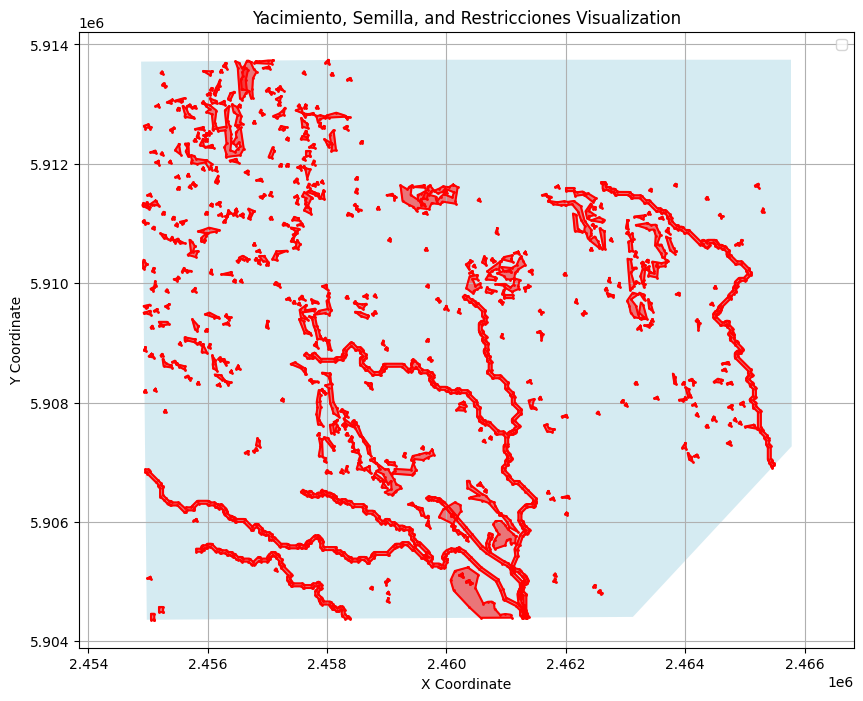

(2454884.17, 5913711.61)


In [4]:
fun_generacion_mapa(polygon,restrictions,[],panel_size, 0)
print(min(polygon))

C:\Users\juani\AppData\Local\Temp\ipykernel_8640\4264836098.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


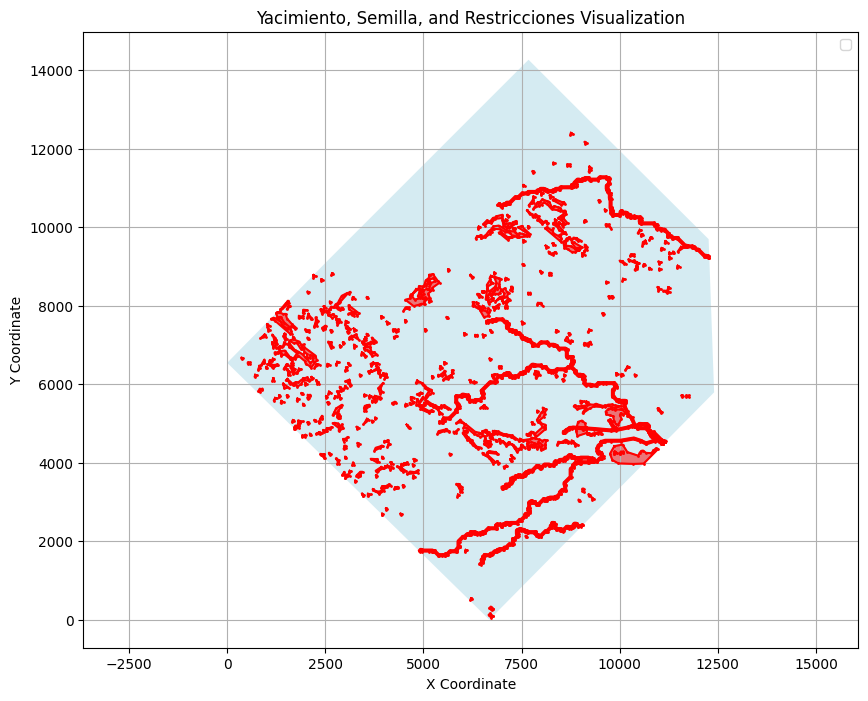

In [5]:
rotated_polygon, rotated_restrictions, translation_vector = rotation(polygon, restrictions, 45)
fun_generacion_mapa(rotated_polygon, rotated_restrictions, [], panel_size, 0)

In [6]:
# print(polygon)
# points = np.array(polygon)
# min_x, min_y = points.min(axis = 0)
# rotation_matrix = np.array([[math.cos(math.radians(45)), -math.sin(math.radians(45))], 
#                                 [math.sin(math.radians(45)), math.cos(math.radians(45))]])
# rotated_points = points @ rotation_matrix.T
# print(rotated_points)

achicamos el mapa (5% de lo que era)

C:\Users\juani\AppData\Local\Temp\ipykernel_8640\4264836098.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


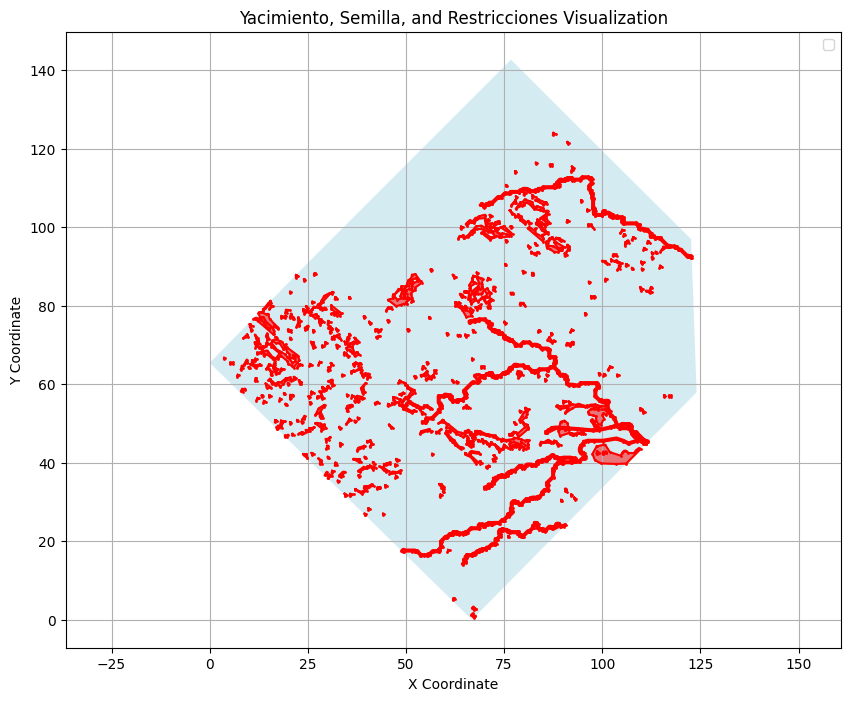

In [7]:
reduced_polygon, reduced_size, reduced_restrictions, _ = change_dimensions(rotated_polygon, panel_size, rotated_restrictions, 0.01, [])
fun_generacion_mapa(reduced_polygon, reduced_restrictions, [], reduced_size, 0)

In [8]:
four = [(29.0, 70.75), (39.800000000000004, 70.75), (49.6, 38.85), (50.6, 70.75), (60.4, 38.85), (61.4, 70.75), (62.4, 102.65), (71.20000000000002, 38.85), (72.20000000000002, 70.75), (73.20000000000002, 102.65), (82.00000000000001, 38.85), (83.00000000000001, 70.75), (84.00000000000001, 102.65), (93.80000000000001, 70.75), (94.80000000000001, 102.65), (104.60000000000001, 70.75), (115.4, 70.75)]
print(reduced_size)
#sol1 = grid_heuristic(reduced_polygon, reduced_size, reduced_restrictions, [])

[(10.8, 31.900000000000002), (7.0, 3.4)]


In [9]:
import numpy as np
from shapely.geometry import Polygon

def rotate_rectangle(polygon: Polygon, angle: float) -> Polygon:
    """
    Rotates a rectangle around its center by a given angle using NumPy.
    
    :param polygon: A `Polygon` object representing the rectangle.
    :param angle: Rotation angle in degrees.
    :return: A new `Polygon` object with rotated vertices.
    """
    # Ensure input is a rectangle
    vertices = np.array(polygon.exterior.coords[:-1])  # Exclude duplicate last vertex

    # Calculate the center
    center = vertices.mean(axis=0)

    # Translate vertices to origin (center at (0, 0))
    translated_vertices = vertices - center

    # Convert angle to radians and create rotation matrix
    theta = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

    # Apply the rotation
    rotated_vertices = translated_vertices @ rotation_matrix.T

    # Translate back to original position
    final_vertices = rotated_vertices + center

    # Return the rotated rectangle as a new Polygon
    return Polygon(final_vertices)

In [10]:
sol = place_rectangles(reduced_polygon, reduced_restrictions, reduced_size[1][::-1])

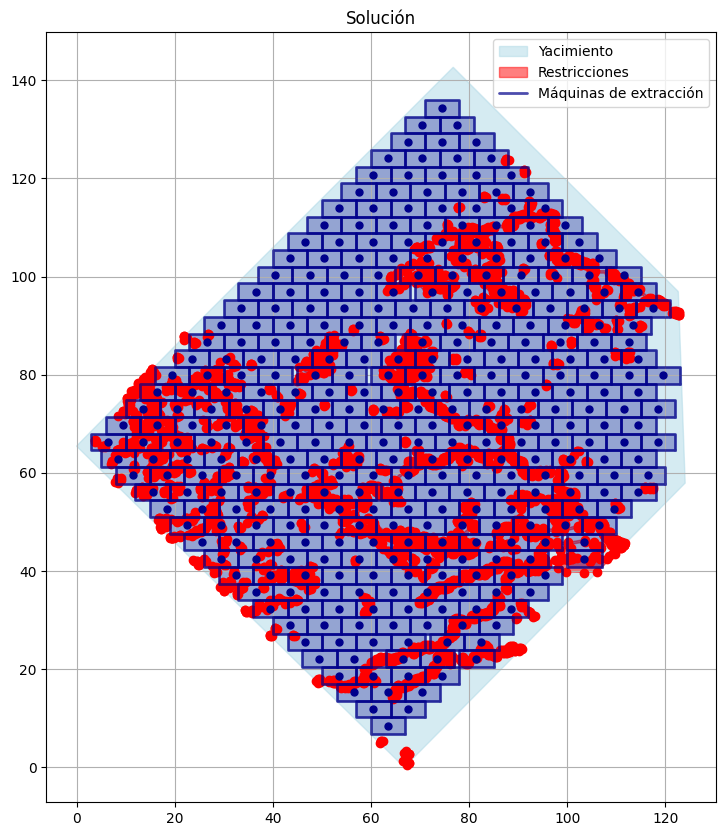

In [11]:
plot_solution(reduced_polygon, reduced_restrictions, sol)

#### Entrada_V2 sin optimizar pintado
[<POLYGON ((63.4 7, 63.4 14, 60 14, 60 7, 63.4 7))>, <POLYGON ((66.8 7, 66.8 14, 63.4 14, 63.4 7, 66.8 7))>, <POLYGON ((70.2 7, 70.2 14, 66.8 14, 66.8 7, 70.2 7))>, <POLYGON ((73.6 7, 73.6 14, 70.2 14, 70.2 7, 73.6 7))>, <POLYGON ((56.4 14, 56.4 21, 53 21, 53 14, 56.4 14))>, <POLYGON ((60.8 14, 60.8 21, 57.4 21, 57.4 14, 60.8 14))>, <POLYGON ((64.2 14, 64.2 21, 60.8 21, 60.8 14, 64.2 14))>, <POLYGON ((67.6 14, 67.6 21, 64.2 21, 64.2 14, 67.6 14))>, <POLYGON ((71 14, 71 21, 67.6 21, 67.6 14, 71 14))>, <POLYGON ((74.4 14, 74.4 21, 71 21, 71 14, 74.4 14))>, <POLYGON ((77.8 14, 77.8 21, 74.4 21, 74.4 14, 77.8 14))>, <POLYGON ((49.4 21, 49.4 28, 46 28, 46 21, 49.4 21))>, <POLYGON ((52.8 21, 52.8 28, 49.4 28, 49.4 21, 52.8 21))>, <POLYGON ((56.2 21, 56.2 28, 52.8 28, 52.8 21, 56.2 21))>, <POLYGON ((59.6 21, 59.6 28, 56.2 28, 56.2 21, 59.6 21))>, <POLYGON ((63 21, 63 28, 59.6 28, 59.6 21, 63 21))>, <POLYGON ((66.4 21, 66.4 28, 63 28, 63 21, 66.4 21))>, <POLYGON ((69.8 21, 69.8 28, 66.4 28, 66.4 21, 69.8 21))>, <POLYGON ((76.2 21, 76.2 28, 72.8 28, 72.8 21, 76.2 21))>, <POLYGON ((79.6 21, 79.6 28, 76.2 28, 76.2 21, 79.6 21))>, <POLYGON ((83 21, 83 28, 79.6 28, 79.6 21, 83 21))>, <POLYGON ((86.4 21, 86.4 28, 83 28, 83 21, 86.4 21))>, <POLYGON ((42.4 28, 42.4 35, 39 35, 39 28, 42.4 28))>, <POLYGON ((45.8 28, 45.8 35, 42.4 35, 42.4 28, 45.8 28))>, <POLYGON ((49.2 28, 49.2 35, 45.8 35, 45.8 28, 49.2 28))>, <POLYGON ((52.6 28, 52.6 35, 49.2 35, 49.2 28, 52.6 28))>, <POLYGON ((56 28, 56 35, 52.6 35, 52.6 28, 56 28))>, <POLYGON ((59.4 28, 59.4 35, 56 35, 56 28, 59.4 28))>, <POLYGON ((62.8 28, 62.8 35, 59.4 35, 59.4 28, 62.8 28))>, <POLYGON ((66.2 28, 66.2 35, 62.8 35, 62.8 28, 66.2 28))>, <POLYGON ((69.6 28, 69.6 35, 66.2 35, 66.2 28, 69.6 28))>, <POLYGON ((73 28, 73 35, 69.6 35, 69.6 28, 73 28))>, <POLYGON ((76.4 28, 76.4 35, 73 35, 73 28, 76.4 28))>, <POLYGON ((79.8 28, 79.8 35, 76.4 35, 76.4 28, 79.8 28))>, <POLYGON ((83.2 28, 83.2 35, 79.8 35, 79.8 28, 83.2 28))>, <POLYGON ((86.6 28, 86.6 35, 83.2 35, 83.2 28, 86.6 28))>, <POLYGON ((90 28, 90 35, 86.6 35, 86.6 28, 90 28))>, <POLYGON ((93.4 28, 93.4 35, 90 35, 90 28, 93.4 28))>, <POLYGON ((35.4 35, 35.4 42, 32 42, 32 35, 35.4 35))>, <POLYGON ((38.8 35, 38.8 42, 35.4 42, 35.4 35, 38.8 35))>, <POLYGON ((42.2 35, 42.2 42, 38.8 42, 38.8 35, 42.2 35))>, <POLYGON ((45.6 35, 45.6 42, 42.2 42, 42.2 35, 45.6 35))>, <POLYGON ((49 35, 49 42, 45.6 42, 45.6 35, 49 35))>, <POLYGON ((52.4 35, 52.4 42, 49 42, 49 35, 52.4 35))>, <POLYGON ((55.8 35, 55.8 42, 52.4 42, 52.4 35, 55.8 35))>, <POLYGON ((59.2 35, 59.2 42, 55.8 42, 55.8 35, 59.2 35))>, <POLYGON ((62.6 35, 62.6 42, 59.2 42, 59.2 35, 62.6 35))>, <POLYGON ((66 35, 66 42, 62.6 42, 62.6 35, 66 35))>, <POLYGON ((69.4 35, 69.4 42, 66 42, 66 35, 69.4 35))>, <POLYGON ((72.8 35, 72.8 42, 69.4 42, 69.4 35, 72.8 35))>, <POLYGON ((76.2 35, 76.2 42, 72.8 42, 72.8 35, 76.2 35))>, <POLYGON ((80.6 35, 80.6 42, 77.2 42, 77.2 35, 80.6 35))>, <POLYGON ((84 35, 84 42, 80.6 42, 80.6 35, 84 35))>, <POLYGON ((87.4 35, 87.4 42, 84 42, 84 35, 87.4 35))>, <POLYGON ((90.8 35, 90.8 42, 87.4 42, 87.4 35, 90.8 35))>, <POLYGON ((94.2 35, 94.2 42, 90.8 42, 90.8 35, 94.2 35))>, <POLYGON ((97.6 35, 97.6 42, 94.2 42, 94.2 35, 97.6 35))>, <POLYGON ((101 35, 101 42, 97.6 42, 97.6 35, 101 35))>, <POLYGON ((27.4 42, 27.4 49, 24 49, 24 42, 27.4 42))>, <POLYGON ((30.8 42, 30.8 49, 27.4 49, 27.4 42, 30.8 42))>, <POLYGON ((34.2 42, 34.2 49, 30.8 49, 30.8 42, 34.2 42))>, <POLYGON ((37.6 42, 37.6 49, 34.2 49, 34.2 42, 37.6 42))>, <POLYGON ((41 42, 41 49, 37.6 49, 37.6 42, 41 42))>, <POLYGON ((44.4 42, 44.4 49, 41 49, 41 42, 44.4 42))>, <POLYGON ((47.8 42, 47.8 49, 44.4 49, 44.4 42, 47.8 42))>, <POLYGON ((51.2 42, 51.2 49, 47.8 49, 47.8 42, 51.2 42))>, <POLYGON ((54.6 42, 54.6 49, 51.2 49, 51.2 42, 54.6 42))>, <POLYGON ((58 42, 58 49, 54.6 49, 54.6 42, 58 42))>, <POLYGON ((61.4 42, 61.4 49, 58 49, 58 42, 61.4 42))>, <POLYGON ((64.8 42, 64.8 49, 61.4 49, 61.4 42, 64.8 42))>, <POLYGON ((69.2 42, 69.2 49, 65.8 49, 65.8 42, 69.2 42))>, <POLYGON ((72.6 42, 72.6 49, 69.2 49, 69.2 42, 72.6 42))>, <POLYGON ((76 42, 76 49, 72.6 49, 72.6 42, 76 42))>, <POLYGON ((83.4 42, 83.4 49, 80 49, 80 42, 83.4 42))>, <POLYGON ((86.8 42, 86.8 49, 83.4 49, 83.4 42, 86.8 42))>, <POLYGON ((90.2 42, 90.2 49, 86.8 49, 86.8 42, 90.2 42))>, <POLYGON ((93.6 42, 93.6 49, 90.2 49, 90.2 42, 93.6 42))>, <POLYGON ((97 42, 97 49, 93.6 49, 93.6 42, 97 42))>, <POLYGON ((103.4 42, 103.4 49, 100 49, 100 42, 103.4 42))>, <POLYGON ((107.8 42, 107.8 49, 104.4 49, 104.4 42, 107.8 42))>, <POLYGON ((20.4 49, 20.4 56, 17 56, 17 49, 20.4 49))>, <POLYGON ((23.8 49, 23.8 56, 20.4 56, 20.4 49, 23.8 49))>, <POLYGON ((27.2 49, 27.2 56, 23.8 56, 23.8 49, 27.2 49))>, <POLYGON ((30.6 49, 30.6 56, 27.2 56, 27.2 49, 30.6 49))>, <POLYGON ((34 49, 34 56, 30.6 56, 30.6 49, 34 49))>, <POLYGON ((37.4 49, 37.4 56, 34 56, 34 49, 37.4 49))>, <POLYGON ((40.8 49, 40.8 56, 37.4 56, 37.4 49, 40.8 49))>, <POLYGON ((44.2 49, 44.2 56, 40.8 56, 40.8 49, 44.2 49))>, <POLYGON ((47.6 49, 47.6 56, 44.2 56, 44.2 49, 47.6 49))>, <POLYGON ((51 49, 51 56, 47.6 56, 47.6 49, 51 49))>, <POLYGON ((54.4 49, 54.4 56, 51 56, 51 49, 54.4 49))>, <POLYGON ((57.8 49, 57.8 56, 54.4 56, 54.4 49, 57.8 49))>, <POLYGON ((61.2 49, 61.2 56, 57.8 56, 57.8 49, 61.2 49))>, <POLYGON ((64.6 49, 64.6 56, 61.2 56, 61.2 49, 64.6 49))>, <POLYGON ((68 49, 68 56, 64.6 56, 64.6 49, 68 49))>, <POLYGON ((71.4 49, 71.4 56, 68 56, 68 49, 71.4 49))>, <POLYGON ((74.8 49, 74.8 56, 71.4 56, 71.4 49, 74.8 49))>, <POLYGON ((78.2 49, 78.2 56, 74.8 56, 74.8 49, 78.2 49))>, <POLYGON ((82.6 49, 82.6 56, 79.2 56, 79.2 49, 82.6 49))>, <POLYGON ((86 49, 86 56, 82.6 56, 82.6 49, 86 49))>, <POLYGON ((89.4 49, 89.4 56, 86 56, 86 49, 89.4 49))>, <POLYGON ((92.8 49, 92.8 56, 89.4 56, 89.4 49, 92.8 49))>, <POLYGON ((96.2 49, 96.2 56, 92.8 56, 92.8 49, 96.2 49))>, <POLYGON ((104.6 49, 104.6 56, 101.2 56, 101.2 49, 104.6 49))>, <POLYGON ((108 49, 108 56, 104.6 56, 104.6 49, 108 49))>, <POLYGON ((111.4 49, 111.4 56, 108 56, 108 49, 111.4 49))>, <POLYGON ((114.8 49, 114.8 56, 111.4 56, 111.4 49, 114.8 49))>, <POLYGON ((13.4 56, 13.4 63, 10 63, 10 56, 13.4 56))>, <POLYGON ((17.8 56, 17.8 63, 14.4 63, 14.4 56, 17.8 56))>, <POLYGON ((21.2 56, 21.2 63, 17.8 63, 17.8 56, 21.2 56))>, <POLYGON ((24.6 56, 24.6 63, 21.2 63, 21.2 56, 24.6 56))>, <POLYGON ((28 56, 28 63, 24.6 63, 24.6 56, 28 56))>, <POLYGON ((31.4 56, 31.4 63, 28 63, 28 56, 31.4 56))>, <POLYGON ((34.8 56, 34.8 63, 31.4 63, 31.4 56, 34.8 56))>, <POLYGON ((38.2 56, 38.2 63, 34.8 63, 34.8 56, 38.2 56))>, <POLYGON ((41.6 56, 41.6 63, 38.2 63, 38.2 56, 41.6 56))>, <POLYGON ((45 56, 45 63, 41.6 63, 41.6 56, 45 56))>, <POLYGON ((48.4 56, 48.4 63, 45 63, 45 56, 48.4 56))>, <POLYGON ((51.8 56, 51.8 63, 48.4 63, 48.4 56, 51.8 56))>, <POLYGON ((55.2 56, 55.2 63, 51.8 63, 51.8 56, 55.2 56))>, <POLYGON ((58.6 56, 58.6 63, 55.2 63, 55.2 56, 58.6 56))>, <POLYGON ((62 56, 62 63, 58.6 63, 58.6 56, 62 56))>, <POLYGON ((65.4 56, 65.4 63, 62 63, 62 56, 65.4 56))>, <POLYGON ((68.8 56, 68.8 63, 65.4 63, 65.4 56, 68.8 56))>, <POLYGON ((72.2 56, 72.2 63, 68.8 63, 68.8 56, 72.2 56))>, <POLYGON ((75.6 56, 75.6 63, 72.2 63, 72.2 56, 75.6 56))>, <POLYGON ((79 56, 79 63, 75.6 63, 75.6 56, 79 56))>, <POLYGON ((82.4 56, 82.4 63, 79 63, 79 56, 82.4 56))>, <POLYGON ((85.8 56, 85.8 63, 82.4 63, 82.4 56, 85.8 56))>, <POLYGON ((89.2 56, 89.2 63, 85.8 63, 85.8 56, 89.2 56))>, <POLYGON ((92.6 56, 92.6 63, 89.2 63, 89.2 56, 92.6 56))>, <POLYGON ((96 56, 96 63, 92.6 63, 92.6 56, 96 56))>, <POLYGON ((99.4 56, 99.4 63, 96 63, 96 56, 99.4 56))>, <POLYGON ((102.8 56, 102.8 63, 99.4 63, 99.4 56, 102.8 56))>, <POLYGON ((106.2 56, 106.2 63, 102.8 63, 102.8 56, 106.2 56))>, <POLYGON ((109.6 56, 109.6 63, 106.2 63, 106.2 56, 109.6 56))>, <POLYGON ((113 56, 113 63, 109.6 63, 109.6 56, 113 56))>, <POLYGON ((116.4 56, 116.4 63, 113 63, 113 56, 116.4 56))>, <POLYGON ((119.8 56, 119.8 63, 116.4 63, 116.4 56, 119.8 56))>, <POLYGON ((8.4 63, 8.4 70, 5 70, 5 63, 8.4 63))>, <POLYGON ((11.8 63, 11.8 70, 8.4 70, 8.4 63, 11.8 63))>, <POLYGON ((15.2 63, 15.2 70, 11.8 70, 11.8 63, 15.2 63))>, <POLYGON ((18.6 63, 18.6 70, 15.2 70, 15.2 63, 18.6 63))>, <POLYGON ((22 63, 22 70, 18.6 70, 18.6 63, 22 63))>, <POLYGON ((25.4 63, 25.4 70, 22 70, 22 63, 25.4 63))>, <POLYGON ((28.8 63, 28.8 70, 25.4 70, 25.4 63, 28.8 63))>, <POLYGON ((32.2 63, 32.2 70, 28.8 70, 28.8 63, 32.2 63))>, <POLYGON ((35.6 63, 35.6 70, 32.2 70, 32.2 63, 35.6 63))>, <POLYGON ((39 63, 39 70, 35.6 70, 35.6 63, 39 63))>, <POLYGON ((42.4 63, 42.4 70, 39 70, 39 63, 42.4 63))>, <POLYGON ((45.8 63, 45.8 70, 42.4 70, 42.4 63, 45.8 63))>, <POLYGON ((49.2 63, 49.2 70, 45.8 70, 45.8 63, 49.2 63))>, <POLYGON ((52.6 63, 52.6 70, 49.2 70, 49.2 63, 52.6 63))>, <POLYGON ((56 63, 56 70, 52.6 70, 52.6 63, 56 63))>, <POLYGON ((59.4 63, 59.4 70, 56 70, 56 63, 59.4 63))>, <POLYGON ((62.8 63, 62.8 70, 59.4 70, 59.4 63, 62.8 63))>, <POLYGON ((66.2 63, 66.2 70, 62.8 70, 62.8 63, 66.2 63))>, <POLYGON ((69.6 63, 69.6 70, 66.2 70, 66.2 63, 69.6 63))>, <POLYGON ((73 63, 73 70, 69.6 70, 69.6 63, 73 63))>, <POLYGON ((76.4 63, 76.4 70, 73 70, 73 63, 76.4 63))>, <POLYGON ((79.8 63, 79.8 70, 76.4 70, 76.4 63, 79.8 63))>, <POLYGON ((83.2 63, 83.2 70, 79.8 70, 79.8 63, 83.2 63))>, <POLYGON ((86.6 63, 86.6 70, 83.2 70, 83.2 63, 86.6 63))>, <POLYGON ((90 63, 90 70, 86.6 70, 86.6 63, 90 63))>, <POLYGON ((93.4 63, 93.4 70, 90 70, 90 63, 93.4 63))>, <POLYGON ((96.8 63, 96.8 70, 93.4 70, 93.4 63, 96.8 63))>, <POLYGON ((100.2 63, 100.2 70, 96.8 70, 96.8 63, 100.2 63))>, <POLYGON ((103.6 63, 103.6 70, 100.2 70, 100.2 63, 103.6 63))>, <POLYGON ((107 63, 107 70, 103.6 70, 103.6 63, 107 63))>, <POLYGON ((110.4 63, 110.4 70, 107 70, 107 63, 110.4 63))>, <POLYGON ((113.8 63, 113.8 70, 110.4 70, 110.4 63, 113.8 63))>, <POLYGON ((117.2 63, 117.2 70, 113.8 70, 113.8 63, 117.2 63))>, <POLYGON ((120.6 63, 120.6 70, 117.2 70, 117.2 63, 120.6 63))>, <POLYGON ((15.4 70, 15.4 77, 12 77, 12 70, 15.4 70))>, <POLYGON ((18.8 70, 18.8 77, 15.4 77, 15.4 70, 18.8 70))>, <POLYGON ((22.2 70, 22.2 77, 18.8 77, 18.8 70, 22.2 70))>, <POLYGON ((25.6 70, 25.6 77, 22.2 77, 22.2 70, 25.6 70))>, <POLYGON ((29 70, 29 77, 25.6 77, 25.6 70, 29 70))>, <POLYGON ((32.4 70, 32.4 77, 29 77, 29 70, 32.4 70))>, <POLYGON ((35.8 70, 35.8 77, 32.4 77, 32.4 70, 35.8 70))>, <POLYGON ((39.2 70, 39.2 77, 35.8 77, 35.8 70, 39.2 70))>, <POLYGON ((42.6 70, 42.6 77, 39.2 77, 39.2 70, 42.6 70))>, <POLYGON ((46 70, 46 77, 42.6 77, 42.6 70, 46 70))>, <POLYGON ((49.4 70, 49.4 77, 46 77, 46 70, 49.4 70))>, <POLYGON ((52.8 70, 52.8 77, 49.4 77, 49.4 70, 52.8 70))>, <POLYGON ((56.2 70, 56.2 77, 52.8 77, 52.8 70, 56.2 70))>, <POLYGON ((59.6 70, 59.6 77, 56.2 77, 56.2 70, 59.6 70))>, <POLYGON ((63 70, 63 77, 59.6 77, 59.6 70, 63 70))>, <POLYGON ((66.4 70, 66.4 77, 63 77, 63 70, 66.4 70))>, <POLYGON ((69.8 70, 69.8 77, 66.4 77, 66.4 70, 69.8 70))>, <POLYGON ((73.2 70, 73.2 77, 69.8 77, 69.8 70, 73.2 70))>, <POLYGON ((76.6 70, 76.6 77, 73.2 77, 73.2 70, 76.6 70))>, <POLYGON ((80 70, 80 77, 76.6 77, 76.6 70, 80 70))>, <POLYGON ((83.4 70, 83.4 77, 80 77, 80 70, 83.4 70))>, <POLYGON ((86.8 70, 86.8 77, 83.4 77, 83.4 70, 86.8 70))>, <POLYGON ((90.2 70, 90.2 77, 86.8 77, 86.8 70, 90.2 70))>, <POLYGON ((93.6 70, 93.6 77, 90.2 77, 90.2 70, 93.6 70))>, <POLYGON ((97 70, 97 77, 93.6 77, 93.6 70, 97 70))>, <POLYGON ((100.4 70, 100.4 77, 97 77, 97 70, 100.4 70))>, <POLYGON ((103.8 70, 103.8 77, 100.4 77, 100.4 70, 103.8 70))>, <POLYGON ((107.2 70, 107.2 77, 103.8 77, 103.8 70, 107.2 70))>, <POLYGON ((110.6 70, 110.6 77, 107.2 77, 107.2 70, 110.6 70))>, <POLYGON ((114 70, 114 77, 110.6 77, 110.6 70, 114 70))>, <POLYGON ((117.4 70, 117.4 77, 114 77, 114 70, 117.4 70))>, <POLYGON ((120.8 70, 120.8 77, 117.4 77, 117.4 70, 120.8 70))>, <POLYGON ((22.4 77, 22.4 84, 19 84, 19 77, 22.4 77))>, <POLYGON ((25.8 77, 25.8 84, 22.4 84, 22.4 77, 25.8 77))>, <POLYGON ((29.2 77, 29.2 84, 25.8 84, 25.8 77, 29.2 77))>, <POLYGON ((32.6 77, 32.6 84, 29.2 84, 29.2 77, 32.6 77))>, <POLYGON ((36 77, 36 84, 32.6 84, 32.6 77, 36 77))>, <POLYGON ((39.4 77, 39.4 84, 36 84, 36 77, 39.4 77))>, <POLYGON ((42.8 77, 42.8 84, 39.4 84, 39.4 77, 42.8 77))>, <POLYGON ((46.2 77, 46.2 84, 42.8 84, 42.8 77, 46.2 77))>, <POLYGON ((52.6 77, 52.6 84, 49.2 84, 49.2 77, 52.6 77))>, <POLYGON ((56 77, 56 84, 52.6 84, 52.6 77, 56 77))>, <POLYGON ((59.4 77, 59.4 84, 56 84, 56 77, 59.4 77))>, <POLYGON ((62.8 77, 62.8 84, 59.4 84, 59.4 77, 62.8 77))>, <POLYGON ((66.2 77, 66.2 84, 62.8 84, 62.8 77, 66.2 77))>, <POLYGON ((69.6 77, 69.6 84, 66.2 84, 66.2 77, 69.6 77))>, <POLYGON ((73 77, 73 84, 69.6 84, 69.6 77, 73 77))>, <POLYGON ((76.4 77, 76.4 84, 73 84, 73 77, 76.4 77))>, <POLYGON ((79.8 77, 79.8 84, 76.4 84, 76.4 77, 79.8 77))>, <POLYGON ((83.2 77, 83.2 84, 79.8 84, 79.8 77, 83.2 77))>, <POLYGON ((86.6 77, 86.6 84, 83.2 84, 83.2 77, 86.6 77))>, <POLYGON ((90 77, 90 84, 86.6 84, 86.6 77, 90 77))>, <POLYGON ((93.4 77, 93.4 84, 90 84, 90 77, 93.4 77))>, <POLYGON ((96.8 77, 96.8 84, 93.4 84, 93.4 77, 96.8 77))>, <POLYGON ((100.2 77, 100.2 84, 96.8 84, 96.8 77, 100.2 77))>, <POLYGON ((103.6 77, 103.6 84, 100.2 84, 100.2 77, 103.6 77))>, <POLYGON ((107 77, 107 84, 103.6 84, 103.6 77, 107 77))>, <POLYGON ((110.4 77, 110.4 84, 107 84, 107 77, 110.4 77))>, <POLYGON ((113.8 77, 113.8 84, 110.4 84, 110.4 77, 113.8 77))>, <POLYGON ((117.2 77, 117.2 84, 113.8 84, 113.8 77, 117.2 77))>, <POLYGON ((120.6 77, 120.6 84, 117.2 84, 117.2 77, 120.6 77))>, <POLYGON ((29.4 84, 29.4 91, 26 91, 26 84, 29.4 84))>, <POLYGON ((32.8 84, 32.8 91, 29.4 91, 29.4 84, 32.8 84))>, <POLYGON ((36.2 84, 36.2 91, 32.8 91, 32.8 84, 36.2 84))>, <POLYGON ((39.6 84, 39.6 91, 36.2 91, 36.2 84, 39.6 84))>, <POLYGON ((43 84, 43 91, 39.6 91, 39.6 84, 43 84))>, <POLYGON ((46.4 84, 46.4 91, 43 91, 43 84, 46.4 84))>, <POLYGON ((49.8 84, 49.8 91, 46.4 91, 46.4 84, 49.8 84))>, <POLYGON ((55.2 84, 55.2 91, 51.8 91, 51.8 84, 55.2 84))>, <POLYGON ((58.6 84, 58.6 91, 55.2 91, 55.2 84, 58.6 84))>, <POLYGON ((62 84, 62 91, 58.6 91, 58.6 84, 62 84))>, <POLYGON ((65.4 84, 65.4 91, 62 91, 62 84, 65.4 84))>, <POLYGON ((68.8 84, 68.8 91, 65.4 91, 65.4 84, 68.8 84))>, <POLYGON ((72.2 84, 72.2 91, 68.8 91, 68.8 84, 72.2 84))>, <POLYGON ((75.6 84, 75.6 91, 72.2 91, 72.2 84, 75.6 84))>, <POLYGON ((79 84, 79 91, 75.6 91, 75.6 84, 79 84))>, <POLYGON ((82.4 84, 82.4 91, 79 91, 79 84, 82.4 84))>, <POLYGON ((85.8 84, 85.8 91, 82.4 91, 82.4 84, 85.8 84))>, <POLYGON ((89.2 84, 89.2 91, 85.8 91, 85.8 84, 89.2 84))>, <POLYGON ((92.6 84, 92.6 91, 89.2 91, 89.2 84, 92.6 84))>, <POLYGON ((96 84, 96 91, 92.6 91, 92.6 84, 96 84))>, <POLYGON ((99.4 84, 99.4 91, 96 91, 96 84, 99.4 84))>, <POLYGON ((102.8 84, 102.8 91, 99.4 91, 99.4 84, 102.8 84))>, <POLYGON ((106.2 84, 106.2 91, 102.8 91, 102.8 84, 106.2 84))>, <POLYGON ((109.6 84, 109.6 91, 106.2 91, 106.2 84, 109.6 84))>, <POLYGON ((113 84, 113 91, 109.6 91, 109.6 84, 113 84))>, <POLYGON ((116.4 84, 116.4 91, 113 91, 113 84, 116.4 84))>, <POLYGON ((119.8 84, 119.8 91, 116.4 91, 116.4 84, 119.8 84))>, <POLYGON ((36.4 91, 36.4 98, 33 98, 33 91, 36.4 91))>, <POLYGON ((39.8 91, 39.8 98, 36.4 98, 36.4 91, 39.8 91))>, <POLYGON ((43.2 91, 43.2 98, 39.8 98, 39.8 91, 43.2 91))>, <POLYGON ((46.6 91, 46.6 98, 43.2 98, 43.2 91, 46.6 91))>, <POLYGON ((50 91, 50 98, 46.6 98, 46.6 91, 50 91))>, <POLYGON ((53.4 91, 53.4 98, 50 98, 50 91, 53.4 91))>, <POLYGON ((56.8 91, 56.8 98, 53.4 98, 53.4 91, 56.8 91))>, <POLYGON ((60.2 91, 60.2 98, 56.8 98, 56.8 91, 60.2 91))>, <POLYGON ((63.6 91, 63.6 98, 60.2 98, 60.2 91, 63.6 91))>, <POLYGON ((67 91, 67 98, 63.6 98, 63.6 91, 67 91))>, <POLYGON ((70.4 91, 70.4 98, 67 98, 67 91, 70.4 91))>, <POLYGON ((73.8 91, 73.8 98, 70.4 98, 70.4 91, 73.8 91))>, <POLYGON ((77.2 91, 77.2 98, 73.8 98, 73.8 91, 77.2 91))>, <POLYGON ((80.6 91, 80.6 98, 77.2 98, 77.2 91, 80.6 91))>, <POLYGON ((84 91, 84 98, 80.6 98, 80.6 91, 84 91))>, <POLYGON ((87.4 91, 87.4 98, 84 98, 84 91, 87.4 91))>, <POLYGON ((90.8 91, 90.8 98, 87.4 98, 87.4 91, 90.8 91))>, <POLYGON ((94.2 91, 94.2 98, 90.8 98, 90.8 91, 94.2 91))>, <POLYGON ((97.6 91, 97.6 98, 94.2 98, 94.2 91, 97.6 91))>, <POLYGON ((101 91, 101 98, 97.6 98, 97.6 91, 101 91))>, <POLYGON ((104.4 91, 104.4 98, 101 98, 101 91, 104.4 91))>, <POLYGON ((107.8 91, 107.8 98, 104.4 98, 104.4 91, 107.8 91))>, <POLYGON ((111.2 91, 111.2 98, 107.8 98, 107.8 91, 111.2 91))>, <POLYGON ((114.6 91, 114.6 98, 111.2 98, 111.2 91, 114.6 91))>, <POLYGON ((118 91, 118 98, 114.6 98, 114.6 91, 118 91))>, <POLYGON ((43.4 98, 43.4 105, 40 105, 40 98, 43.4 98))>, <POLYGON ((46.8 98, 46.8 105, 43.4 105, 43.4 98, 46.8 98))>, <POLYGON ((50.2 98, 50.2 105, 46.8 105, 46.8 98, 50.2 98))>, <POLYGON ((53.6 98, 53.6 105, 50.2 105, 50.2 98, 53.6 98))>, <POLYGON ((57 98, 57 105, 53.6 105, 53.6 98, 57 98))>, <POLYGON ((60.4 98, 60.4 105, 57 105, 57 98, 60.4 98))>, <POLYGON ((63.8 98, 63.8 105, 60.4 105, 60.4 98, 63.8 98))>, <POLYGON ((67.2 98, 67.2 105, 63.8 105, 63.8 98, 67.2 98))>, <POLYGON ((70.6 98, 70.6 105, 67.2 105, 67.2 98, 70.6 98))>, <POLYGON ((74 98, 74 105, 70.6 105, 70.6 98, 74 98))>, <POLYGON ((77.4 98, 77.4 105, 74 105, 74 98, 77.4 98))>, <POLYGON ((80.8 98, 80.8 105, 77.4 105, 77.4 98, 80.8 98))>, <POLYGON ((84.2 98, 84.2 105, 80.8 105, 80.8 98, 84.2 98))>, <POLYGON ((88.6 98, 88.6 105, 85.2 105, 85.2 98, 88.6 98))>, <POLYGON ((92 98, 92 105, 88.6 105, 88.6 98, 92 98))>, <POLYGON ((95.4 98, 95.4 105, 92 105, 92 98, 95.4 98))>, <POLYGON ((98.8 98, 98.8 105, 95.4 105, 95.4 98, 98.8 98))>, <POLYGON ((102.2 98, 102.2 105, 98.8 105, 98.8 98, 102.2 98))>, <POLYGON ((105.6 98, 105.6 105, 102.2 105, 102.2 98, 105.6 98))>, <POLYGON ((109 98, 109 105, 105.6 105, 105.6 98, 109 98))>, <POLYGON ((112.4 98, 112.4 105, 109 105, 109 98, 112.4 98))>, <POLYGON ((50.4 105, 50.4 112, 47 112, 47 105, 50.4 105))>, <POLYGON ((53.8 105, 53.8 112, 50.4 112, 50.4 105, 53.8 105))>, <POLYGON ((57.2 105, 57.2 112, 53.8 112, 53.8 105, 57.2 105))>, <POLYGON ((60.6 105, 60.6 112, 57.2 112, 57.2 105, 60.6 105))>, <POLYGON ((64 105, 64 112, 60.6 112, 60.6 105, 64 105))>, <POLYGON ((67.4 105, 67.4 112, 64 112, 64 105, 67.4 105))>, <POLYGON ((70.8 105, 70.8 112, 67.4 112, 67.4 105, 70.8 105))>, <POLYGON ((74.2 105, 74.2 112, 70.8 112, 70.8 105, 74.2 105))>, <POLYGON ((78.6 105, 78.6 112, 75.2 112, 75.2 105, 78.6 105))>, <POLYGON ((83 105, 83 112, 79.6 112, 79.6 105, 83 105))>, <POLYGON ((86.4 105, 86.4 112, 83 112, 83 105, 86.4 105))>, <POLYGON ((89.8 105, 89.8 112, 86.4 112, 86.4 105, 89.8 105))>, <POLYGON ((93.2 105, 93.2 112, 89.8 112, 89.8 105, 93.2 105))>, <POLYGON ((96.6 105, 96.6 112, 93.2 112, 93.2 105, 96.6 105))>, <POLYGON ((100 105, 100 112, 96.6 112, 96.6 105, 100 105))>, <POLYGON ((103.4 105, 103.4 112, 100 112, 100 105, 103.4 105))>, <POLYGON ((106.8 105, 106.8 112, 103.4 112, 103.4 105, 106.8 105))>, <POLYGON ((57.4 112, 57.4 119, 54 119, 54 112, 57.4 112))>, <POLYGON ((60.8 112, 60.8 119, 57.4 119, 57.4 112, 60.8 112))>, <POLYGON ((64.2 112, 64.2 119, 60.8 119, 60.8 112, 64.2 112))>, <POLYGON ((67.6 112, 67.6 119, 64.2 119, 64.2 112, 67.6 112))>, <POLYGON ((71 112, 71 119, 67.6 119, 67.6 112, 71 112))>, <POLYGON ((74.4 112, 74.4 119, 71 119, 71 112, 74.4 112))>, <POLYGON ((77.8 112, 77.8 119, 74.4 119, 74.4 112, 77.8 112))>, <POLYGON ((81.2 112, 81.2 119, 77.8 119, 77.8 112, 81.2 112))>, <POLYGON ((84.6 112, 84.6 119, 81.2 119, 81.2 112, 84.6 112))>, <POLYGON ((88 112, 88 119, 84.6 119, 84.6 112, 88 112))>, <POLYGON ((91.4 112, 91.4 119, 88 119, 88 112, 91.4 112))>, <POLYGON ((94.8 112, 94.8 119, 91.4 119, 91.4 112, 94.8 112))>, <POLYGON ((98.2 112, 98.2 119, 94.8 119, 94.8 112, 98.2 112))>, <POLYGON ((64.4 119, 64.4 126, 61 126, 61 119, 64.4 119))>, <POLYGON ((67.8 119, 67.8 126, 64.4 126, 64.4 119, 67.8 119))>, <POLYGON ((71.2 119, 71.2 126, 67.8 126, 67.8 119, 71.2 119))>, <POLYGON ((74.6 119, 74.6 126, 71.2 126, 71.2 119, 74.6 119))>, <POLYGON ((78 119, 78 126, 74.6 126, 74.6 119, 78 119))>, <POLYGON ((81.4 119, 81.4 126, 78 126, 78 119, 81.4 119))>, <POLYGON ((84.8 119, 84.8 126, 81.4 126, 81.4 119, 84.8 119))>, <POLYGON ((88.2 119, 88.2 126, 84.8 126, 84.8 119, 88.2 119))>, <POLYGON ((91.6 119, 91.6 126, 88.2 126, 88.2 119, 91.6 119))>, <POLYGON ((71.4 126, 71.4 133, 68 133, 68 126, 71.4 126))>, <POLYGON ((74.8 126, 74.8 133, 71.4 133, 71.4 126, 74.8 126))>, <POLYGON ((78.2 126, 78.2 133, 74.8 133, 74.8 126, 78.2 126))>, <POLYGON ((81.6 126, 81.6 133, 78.2 133, 78.2 126, 81.6 126))>, <POLYGON ((85 126, 85 133, 81.6 133, 81.6 126, 85 126))>, <POLYGON ((78.4 133, 78.4 140, 75 140, 75 133, 78.4 133))>]


In [12]:
print(reduced_size)
centers = []
red = reduced_size[::-1]
print(red)

for i in sol:
    x = i.centroid.x
    y = i.centroid.y
    size = red[0]
    centers.append((x, y))

[(10.8, 31.900000000000002), (7.0, 3.4)]
[(7.0, 3.4), (10.8, 31.900000000000002)]


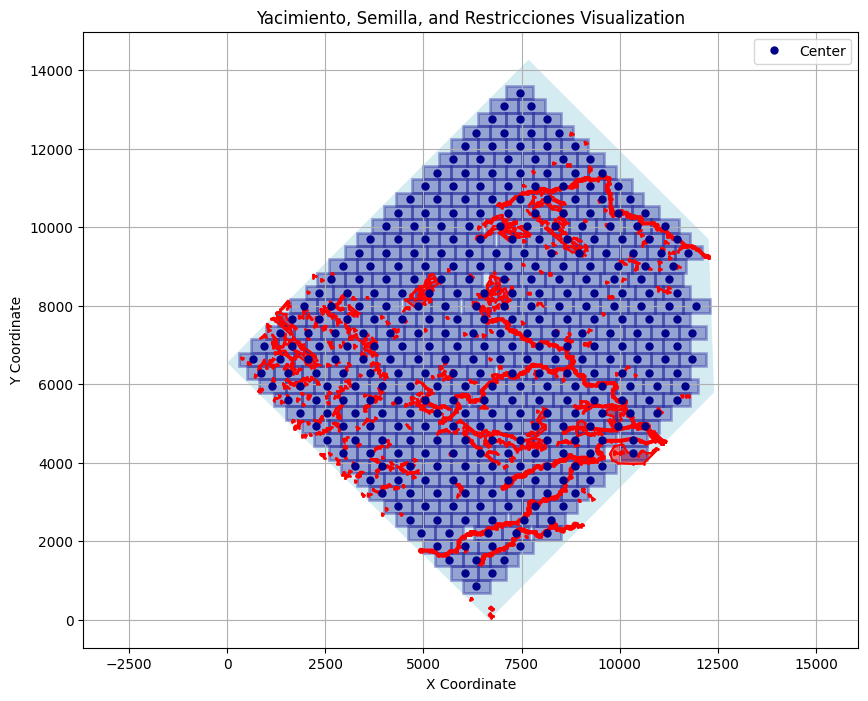

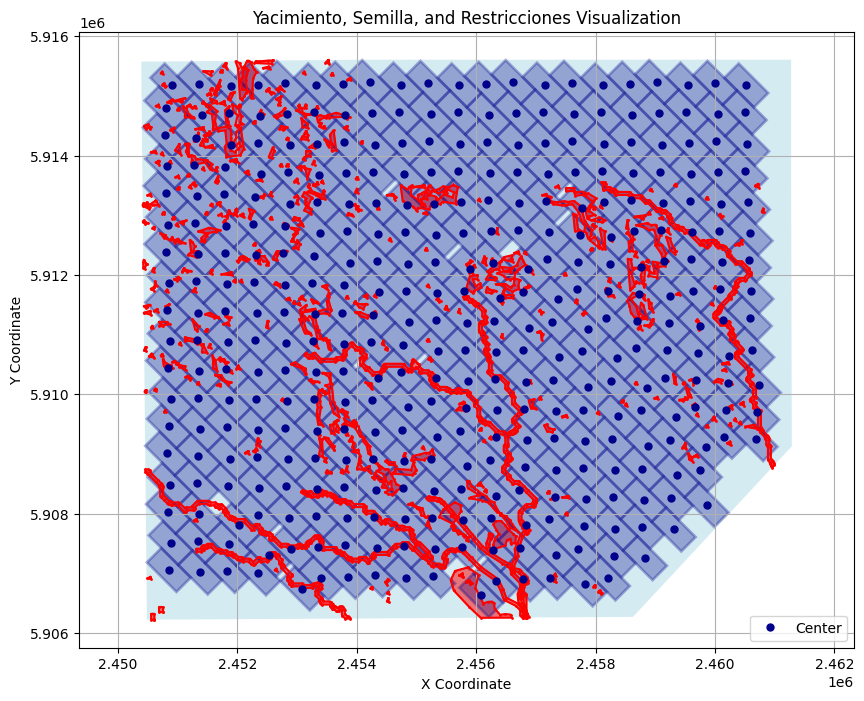

In [13]:
b_pol, b_size, b_restr, b_rect = change_dimensions(reduced_polygon, reduced_size, reduced_restrictions, 100, [centers])

fun_generacion_mapa(b_pol, b_restr, b_rect, [b_size[1]], 0)
r_pol, r_restr, r_rect, translation_vector_ = rotation(b_pol, b_restr, -45, b_rect, np.array((translation_vector[0], -translation_vector[1])))
fun_generacion_mapa(r_pol, r_restr, r_rect, [b_size[1]], -45)

optimizamos

In [14]:
opt_centers = optimize_area(place_rectangles, reduced_polygon, [centers], [b_size[1]], reduced_restrictions)

  0%|          | 0/100 [00:00<?, ?it/s]

TypeError: 'float' object is not iterable

In [ ]:


calculate_area(r_pol, [len(centers)], [b_size[1]])

0.8828200365097744

[(196.0, 241.75), (196.0, 401.25), (250.0, 241.75), (250.0, 401.25), (304.0, 241.75), (304.0, 401.25), (358.0, 241.75), (358.0, 401.25), (358.0, 560.75), (412.0, 241.75), (412.0, 401.25), (412.0, 560.75), (466.0, 241.75), (466.0, 401.25), (520.0, 401.25), (574.0, 401.25)]


[(141.0, 309.75), (195.0, 309.75), (249.0, 309.75), (249.0, 469.25), (303.0, 150.25), (303.0, 309.75), (303.0, 469.25), (357.0, 150.25), (357.0, 309.75), (357.0, 469.25), (411.0, 309.75), (411.0, 469.25), (465.0, 309.75), (465.0, 469.25), (519.0, 309.75), (519.0, 469.25)]
